In [ ]:
#http://blog.espol.edu.ec/ccpg1001/archivos-csv-ejercicio-con-grafica-de-temperatura-y-humedad/

columnas:  ['No', 'Date', 'Time', 'ColdJunc0', 'PowerVolt', 'PowerKind', 'WS(ave)', 'WD(ave)', 'WS(max)', 'WD(most)', 'WS(inst_m)', 'WD(inst_m)', 'Max_time', 'Solar_rad', 'TEMP', 'Humidity', 'Rainfall', 'Bar_press.', 'Soil_temp', 'fecha']
SerieDia:  [0, 144, 288, 432, 576, 720, 864, 1008, 1152, 1296, 1440, 1584, 1728, 1872, 2016, 2160, 2304, 2448, 2592, 2736, 2880, 3024, 3168, 3312, 3456, 3600, 3744, 3888, 4032, 4176, 4320, 4463]
días en serie:  32


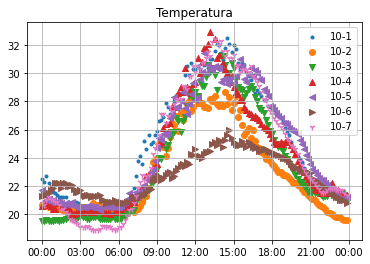

In [2]:
# lecturas archivo.csv de estación meteorológica
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, DayLocator

# INGRESO
#narchivo = "./data/2021OctubreEstMetorologica.csv"
narchivo = "./data/2021_10_EstMeteorologica.csv"

# PROCEDIMIENTO
tabla = pd.read_csv(narchivo, sep=';',decimal=',')
n = len(tabla)

# fechas concatenando columnas de texto
tabla['fecha'] = tabla['Date']+' '+tabla['Time']

# convierte a datetime
fechaformato = "%d/%m/%Y %H:%M:%S"
tabla['fecha'] = pd.to_datetime(tabla['fecha'],
                                format=fechaformato)

# serie por días
diaIndice = [0] # indice inicial
for i in range(1,n-1,1):
    i0_fecha = tabla['fecha'][i-1]
    i1_fecha = tabla['fecha'][i]
    if i0_fecha.day != i1_fecha.day:
        diaIndice.append(i)
diaIndice.append(len(tabla)-1) # indice final
m = len(diaIndice)

# SALIDA
print('columnas: ', list(tabla.keys()))
print('SerieDia: ',diaIndice)
print('días en serie: ', len(diaIndice))

# grafica
figura, grafica = plt.subplots()
marcador = ['.','o','v','^','<','>','1']
for j in range(0,7,1):
    i0 = diaIndice[j]
    i1 = diaIndice[j+1]
    x_horas = tabla['fecha'][i0:i1]-pd.Timedelta(days=j)
    y_temp  = tabla['TEMP'][i0:i1]
    etiqueta = str(tabla['fecha'][i0].month)+'-'
    etiqueta = etiqueta + str(tabla['fecha'][i0].day)
    
    grafica.scatter(x_horas,y_temp,
                    marker = marcador[j%7],
                    label=etiqueta)
    
# formato de eje
grafica.xaxis.set_major_formatter(DateFormatter('%H:%M'))
plt.legend()
plt.title('Temperatura')
plt.grid()
plt.show()
